# Predict student grade class

In [203]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import keras
from keras import layers
from keras.callbacks import EarlyStopping

import tensorflow as tf

In [204]:
# check GPU
from tensorflow.python.client import device_lib
display(tf.config.list_physical_devices("GPU"))
display(device_lib.list_local_devices())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

I0000 00:00:1758883258.298265   71451 gpu_device.cc:2019] Created device /device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:10:00.0, compute capability: 8.9


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5471537181489326479
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5833228288
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6542662074222915177
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:10:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

In [205]:
data_file_path = "../datasets/student_list/"

In [206]:
# setup plotting
# display(plt.style.available)
plt.style.use("seaborn-v0_8-whitegrid")
# setup defaults
plt.rc("figure", autolayout = True)
plt.rc("axes", labelweight = "bold", labelsize = "large",
       titleweight = "bold", titlesize = 18, titlepad = 10)

In [207]:
student_list_train = pd.read_csv(data_file_path + "Student_List_A2.csv")
student_list_train = student_list_train.drop(["GPA"], axis=1)
student_list_train.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GradeClass
0,1002,18,15.408756,0,1,1
1,1003,15,4.210570,26,2,4
2,1004,17,10.028829,14,3,3
3,1005,17,4.672495,17,3,4
4,1006,18,8.191219,0,1,1


In [208]:
df_train = student_list_train.sample(frac=0.60, random_state=0).dropna()

df_valid = student_list_train.drop(df_train.index).dropna()

lower = df_train.quantile(0.01)
upper = df_train.quantile(0.99)
X_train = df_train.drop(["GradeClass", "StudentID"], axis=1).clip(lower=lower, upper=upper, axis=1)
X_valid = df_valid.drop(["GradeClass", "StudentID"], axis=1).clip(lower=lower, upper=upper, axis=1)
y_train = df_train["GradeClass"]
y_valid = df_valid["GradeClass"]

display(X_train.head())
display(y_train.head())

,Age,StudyTimeWeekly,Absences,ParentalSupport
2085,16,6.959373,17,0
1941,16,18.755291,5,2
1727,16,12.134392,19,3
1170,17,0.656510,8,4
723,15,11.540408,29,3


2085    2
1941    1
1727    4
1170    3
723     4
Name: GradeClass, dtype: int64

In [209]:
X_train.isna().sum()
X_train[X_train.isna().any(axis=1)]

,Age,StudyTimeWeekly,Absences,ParentalSupport


In [210]:
# keras model
model = keras.Sequential(
    [
        keras.Input((X_train.shape[1],)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),

        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),

        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        
        layers.Dense(1),
    ]
)

In [211]:
model.compile(
    optimizer="adam",
    loss="mae",
    # metrics=["mae"],
)

In [212]:
# train
early_stopping = EarlyStopping(
    min_delta=0,
    patience=20,
    restore_best_weights=True,
)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 2.9155 - val_loss: 2.1704
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4944 - val_loss: 2.2650
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1683 - val_loss: 1.3286
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8303 - val_loss: 0.8793
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4338 - val_loss: 0.8238
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2382 - val_loss: 1.0760
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2370 - val_loss: 0.6277
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1501 - val_loss: 0.5306
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0620 - val_loss: 0.5626
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0203 - val_loss: 0.5800
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9481 - val_loss: 0.4913
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

<Axes: >

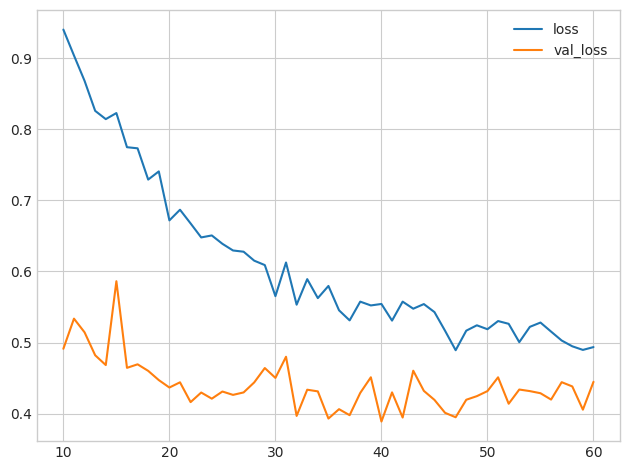

In [213]:
history = pd.DataFrame(history.history)
history[10:].plot()

In [214]:
# predict
x = pd.read_csv(data_file_path + "Student_List_A2_Submission.csv")
y = pd.DataFrame(model.predict(x.drop(["StudentID"], axis=1)), index=x.index, columns=["GradeClass"])
y["GradeClass"] = y["GradeClass"].clip(lower=1, upper=4).round(0).astype(int)
display(x.join(y))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GradeClass
0,5000,16,13.274090,27,1,4
1,5001,17,16.926360,6,2,2
2,5002,15,4.225258,15,3,4
3,5003,16,18.839829,17,3,4
4,5004,15,9.075075,6,2,2
...,...,...,...,...,...,...
156,5156,16,19.078416,15,4,3
157,5157,16,8.052229,24,1,4
158,5158,16,11.660373,27,1,4
159,5159,15,16.744383,8,2,2


In [215]:
output = pd.DataFrame(
    {
        "StudentID" : x.StudentID,
        "GradeClass": y["GradeClass"],
    }
)
display(output)

,StudentID,GradeClass
0,5000,4
1,5001,2
2,5002,4
3,5003,4
4,5004,2
...,...,...
156,5156,3
157,5157,4
158,5158,4
159,5159,2


In [216]:
output.to_csv("../outputs/student_list/submission.csv", index=False)